In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt

import warnings
import imblearn

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('public_ac_n_c_final.csv')

In [4]:
df.head(5)

,Unnamed: 0,fqdn,vt_duration,vt_count,vt_mal_count,vt_ratio,firstseen,lastseen,#query,#ip,...,mean_path_length_per_subdomain_paths,mean_number_of_popular_keywords_per_subdomain_paths,url_length,#query_parameters,#dots_in_path,#brands_in_path,#similar_keywords_in_path,#suspicious_keywords_in_path,Alexa_Rank_Avg,Is_FQDN_In_Alexa_1Year
0,0,bankofamericatec.webcindario.com,9417600.0,12.0,12.0,1.0,NaN,NaN,NaN,NaN,...,3.299454,0.0,81,1,2,1,0,0,1000000.0,False
1,1,ftp.tamraj.fartit.com,41644800.0,54.0,54.0,1.0,2017-04-12 03:57:25,2020-09-29 23:10:27,234833.0,2.0,...,0.000000,0.0,62,1,3,0,0,0,1000000.0,False
2,2,bluewin5.godaddysites.com,43891200.0,49.0,49.0,1.0,2018-06-22 10:01:56,2020-08-11 19:36:27,590.0,1.0,...,0.000000,0.0,66,1,2,0,0,0,1000000.0,False
3,3,appleid-applepage8.serveirc.com,4147200.0,10.0,10.0,1.0,2019-05-05 00:01:14,2019-05-08 18:08:38,132.0,1.0,...,0.000000,0.0,82,1,2,1,0,0,1000000.0,False
4,4,paypl-secureded.000webhostapp.com,2764800.0,4.0,4.0,1.0,NaN,NaN,NaN,NaN,...,0.489898,0.0,81,1,2,0,0,0,1000000.0,False


In [5]:
df.columns

Index(['Unnamed: 0', 'fqdn', 'vt_duration', 'vt_count', 'vt_mal_count',
       'vt_ratio', 'firstseen', 'lastseen', '#query', '#ip', '#ns',
       'ns_matching', '#soa', 'soa_matching', 'label', 'positives',
       'response_code', 'rlength', 'url_after_redirects', 'url',
       'domain_malicious', 'suspicious_tld', 'length', 'entropy', 'fake_tld',
       'brand', 'pop_keywords', 'similar', 'is_idn', 'minus', 'num_subdomains',
       'mean_urls_per_subdomain', 'mean_path_depth_per_subdomain',
       'mean_query_parameters_per_subdomain_paths',
       'mean_path_length_per_subdomain_paths',
       'mean_number_of_popular_keywords_per_subdomain_paths', 'url_length',
       '#query_parameters', '#dots_in_path', '#brands_in_path',
       '#similar_keywords_in_path', '#suspicious_keywords_in_path',
       'Alexa_Rank_Avg', 'Is_FQDN_In_Alexa_1Year'],
      dtype='object')

In [6]:
df = df[['fqdn', 'vt_duration', 'vt_count', 'vt_mal_count',
       'vt_ratio', 'firstseen', 'lastseen', '#query', '#ip', '#ns',
       'ns_matching', '#soa', 'soa_matching', 'label', 'positives',
       'response_code', 'rlength', 'url_after_redirects', 'url',
       'domain_malicious', 'suspicious_tld', 'length', 'entropy', 'fake_tld',
       'brand', 'pop_keywords', 'similar', 'minus', 'num_subdomains',
       'mean_urls_per_subdomain', 'mean_path_depth_per_subdomain',
       'mean_query_parameters_per_subdomain_paths',
       'mean_path_length_per_subdomain_paths',
       'mean_number_of_popular_keywords_per_subdomain_paths', 'url_length',
       '#dots_in_path', '#brands_in_path',
       '#similar_keywords_in_path', '#suspicious_keywords_in_path',
       'Alexa_Rank_Avg', 'Is_FQDN_In_Alexa_1Year']]

In [7]:
df = df.fillna(0)

In [8]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['ns_matching'] = label_encoder.fit_transform(df['ns_matching'])
# df['soa_matching'] = label_encoder.fit_transform(df['soa_matching'])
df['response_code'] = label_encoder.fit_transform(df['response_code'])
df['rlength'] = label_encoder.fit_transform(df['rlength'])
df['url_after_redirects'] = label_encoder.fit_transform(df['url_after_redirects'])
df['domain_malicious'] = label_encoder.fit_transform(df['domain_malicious'])
df['suspicious_tld'] = label_encoder.fit_transform(df['suspicious_tld'])
# df['is_idn'] = label_encoder.fit_transform(df['is_idn'])
df['label'] = label_encoder.fit_transform(df['label'])

In [9]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.1)

In [10]:
print('Full data set\nNumber of Attacker Created\t{}\nNumber of Compromised\t{}\n'.format(df.loc[df.label==1].shape[0], df.loc[df.label==0].shape[0]))
print('Train\nNumber of Attacker Created\t{}\nNumber of Compromised\t{}\n'.format(train.loc[train.label==1].shape[0], train.loc[train.label==0].shape[0]))
print('Test\nNumber of Attacker Created\t{}\nNumber of Compromised\t{}\n'.format(test.loc[test.label==1].shape[0], test.loc[test.label==0].shape[0]))

Full data set
Number of Attacker Created	1157
Number of Compromised	613

Train
Number of Attacker Created	1050
Number of Compromised	543

Test
Number of Attacker Created	107
Number of Compromised	70



In [12]:
oversample = imblearn.over_sampling.SMOTE(k_neighbors=20)
X_train, Y_train = oversample.fit_resample(train[['vt_duration', 'vt_count', 'vt_mal_count',
       'vt_ratio', '#query', '#ip', '#ns',
       'ns_matching', '#soa', 'positives',
       'response_code', 'rlength', 'url_after_redirects',
       'domain_malicious', 'suspicious_tld', 'length', 'entropy', 'fake_tld',
       'brand', 'pop_keywords', 'similar', 'minus', 'num_subdomains',
       'mean_urls_per_subdomain', 'mean_path_depth_per_subdomain',
       'mean_query_parameters_per_subdomain_paths',
       'mean_path_length_per_subdomain_paths',
       'mean_number_of_popular_keywords_per_subdomain_paths', 'url_length',
       '#dots_in_path', '#brands_in_path',
       '#similar_keywords_in_path', '#suspicious_keywords_in_path',
       'Alexa_Rank_Avg', 'Is_FQDN_In_Alexa_1Year']], train.label)

In [13]:

X_test = test[['vt_duration', 'vt_count', 'vt_mal_count',
       'vt_ratio', '#query', '#ip', '#ns',
       'ns_matching', '#soa', 'positives',
       'response_code', 'rlength', 'url_after_redirects',
       'domain_malicious', 'suspicious_tld', 'length', 'entropy', 'fake_tld',
       'brand', 'pop_keywords', 'similar', 'minus', 'num_subdomains',
       'mean_urls_per_subdomain', 'mean_path_depth_per_subdomain',
       'mean_query_parameters_per_subdomain_paths',
       'mean_path_length_per_subdomain_paths',
       'mean_number_of_popular_keywords_per_subdomain_paths', 'url_length',
       '#dots_in_path', '#brands_in_path',
       '#similar_keywords_in_path', '#suspicious_keywords_in_path',
       'Alexa_Rank_Avg', 'Is_FQDN_In_Alexa_1Year']]

Y_test = test.label


In [14]:
classifiers=[['Logistic Regression :',LogisticRegression()],
       ['Decision Tree Classification :',DecisionTreeClassifier()],
       ['Gradient Boosting Classification :', GradientBoostingClassifier()],
       ['Ada Boosting Classification :',AdaBoostClassifier()],
       ['Extra Tree Classification :', ExtraTreesClassifier()],
       ['K-Neighbors Classification :',KNeighborsClassifier()],
       ['Support Vector Classification :',SVC()],
       ['RandomForestClassifier : ',RandomForestClassifier()],      
      ]
cla_pred=[]
for name,model in classifiers:
    model=model
    model.fit(X_train,Y_train)
    predictions = model.predict(X_test)
    cla_pred.append(accuracy_score(Y_test,predictions))
    print(name,accuracy_score(Y_test,predictions),' precision : ',precision_score(Y_test,predictions),' recall : ',recall_score(Y_test,predictions))

Logistic Regression : 0.7740112994350282  precision :  0.8073394495412844  recall :  0.822429906542056
Decision Tree Classification : 0.943502824858757  precision :  0.9532710280373832  recall :  0.9532710280373832
Gradient Boosting Classification : 0.9717514124293786  precision :  0.9811320754716981  recall :  0.9719626168224299
Ada Boosting Classification : 0.9548022598870056  precision :  0.9805825242718447  recall :  0.9439252336448598
Extra Tree Classification : 0.96045197740113  precision :  0.9716981132075472  recall :  0.9626168224299065
K-Neighbors Classification : 0.7231638418079096  precision :  0.79  recall :  0.7383177570093458
Support Vector Classification : 0.768361581920904  precision :  0.7796610169491526  recall :  0.8598130841121495
RandomForestClassifier :  0.9717514124293786  precision :  0.9722222222222222  recall :  0.9813084112149533


In [15]:
RFC = RandomForestClassifier()

In [16]:
from sklearn.model_selection import GridSearchCV

n_estimators = list(range(1,1001,100))
max_depth = list(range(1,1001,100))

hyperparameters = dict(max_depth=max_depth, n_estimators=n_estimators)
h_rfmodel = GridSearchCV(RFC, hyperparameters, cv=5,n_jobs=100, verbose=1)

best_logmodel=h_rfmodel.fit(X_train,Y_train)

n_estimators = best_logmodel.best_estimator_.get_params()['n_estimators']
max_depth = best_logmodel.best_estimator_.get_params()['max_depth']

print('Best Estimators:', n_estimators)
print('Best Max Depth:', max_depth)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=100)]: Using backend LokyBackend with 100 concurrent workers.
[Parallel(n_jobs=100)]: Done 250 tasks      | elapsed:   17.4s
[Parallel(n_jobs=100)]: Done 500 out of 500 | elapsed:   29.7s finished


Best Estimators: 801
Best Max Depth: 901


In [17]:
RFC = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators)
RFC.fit(X_train,Y_train)
predictions_RFC = RFC.predict(X_test)

In [18]:
print('Random Forest',accuracy_score(Y_test,predictions_RFC),' precision : ',precision_score(Y_test,predictions_RFC),' recall : ',recall_score(Y_test,predictions_RFC),'\n')
print(classification_report(Y_test,predictions_RFC))

Random Forest 0.9717514124293786  precision :  0.9722222222222222  recall :  0.9813084112149533 

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        70
           1       0.97      0.98      0.98       107

    accuracy                           0.97       177
   macro avg       0.97      0.97      0.97       177
weighted avg       0.97      0.97      0.97       177



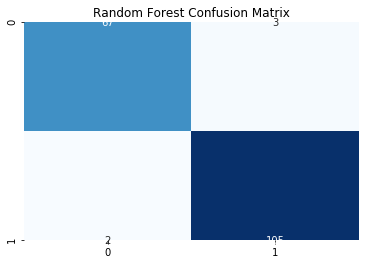

In [19]:
plt.title("Random Forest Confusion Matrix")
sns.heatmap(confusion_matrix(Y_test, predictions_RFC),annot=True,cmap="Blues",fmt="g",cbar=False)
plt.savefig('attacker_created_compromised_classifier_confusion_matrix_gt2.png')
plt.show()

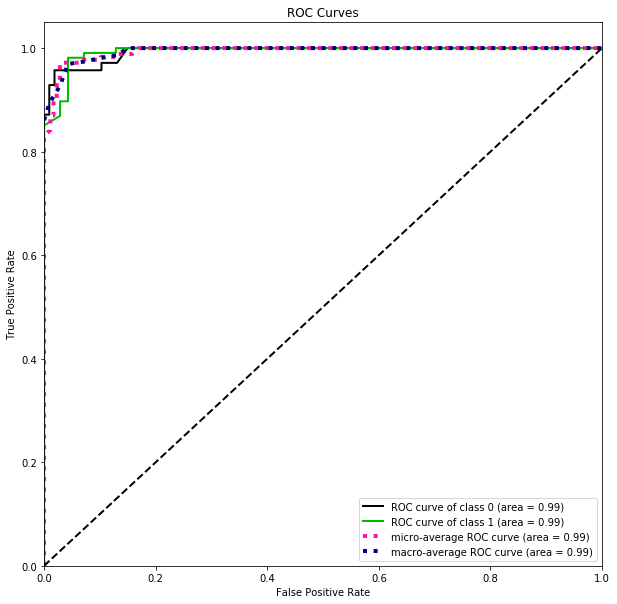

In [20]:
false_positive_rate_RFC, true_positive_rate_RFC, thresholds_RFC = roc_curve(Y_test,RFC.predict_proba(X_test)[:,1])
skplt.metrics.plot_roc_curve(Y_test.values,RFC.predict_proba(X_test), figsize = (10,10))
plt.savefig('attacker_created_compromised_classifier_roc_gt2.png')
plt.show()

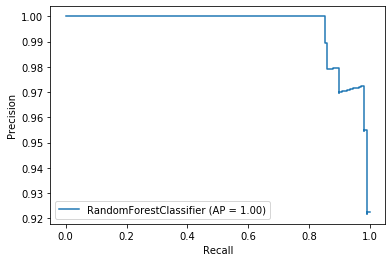

In [21]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(RFC, X_test, Y_test)
plt.savefig('attacker_created_compromised_classifier_precision_recall_curve_gt2.png')

Feature ranking:
1. feature 13 - domain_malicious (0.1651788513041494)
2. feature 24 - mean_path_depth_per_subdomain (0.1334172252301799)
3. feature 26 - mean_path_length_per_subdomain_paths (0.09476483142631664)
4. feature 30 - #brands_in_path (0.07406729389578003)
5. feature 18 - brand (0.06566845666832544)
6. feature 20 - similar (0.04764833471270462)
7. feature 23 - mean_urls_per_subdomain (0.04715448501190323)
8. feature 9 - positives (0.042695975373807794)
9. feature 0 - vt_duration (0.03278115067953201)
10. feature 21 - minus (0.029520368352821576)
11. feature 28 - url_length (0.025058689840611128)
12. feature 15 - length (0.02494738416218468)
13. feature 2 - vt_mal_count (0.022844190325797806)
14. feature 4 - #query (0.021454692138344465)
15. feature 1 - vt_count (0.020848163605718877)
16. feature 16 - entropy (0.020081447930967073)
17. feature 5 - #ip (0.01908545689459701)
18. feature 3 - vt_ratio (0.017317630887156845)
19. feature 10 - response_code (0.015151169405758088)
20.

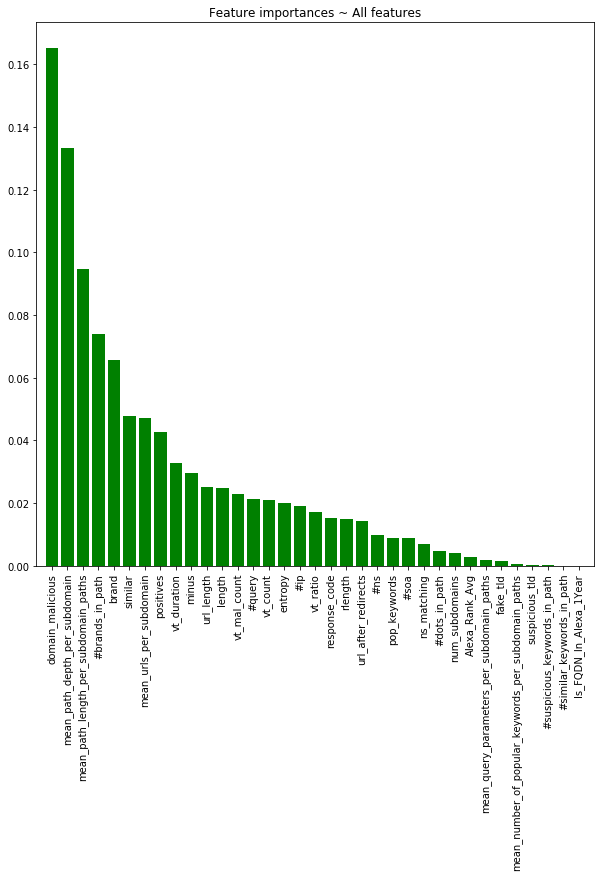

In [22]:
import numpy as np
importances = RFC.feature_importances_
std = np.std([RFC.feature_importances_ for tree in RFC.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
Feature = ['vt_duration', 'vt_count', 'vt_mal_count',
       'vt_ratio', '#query', '#ip', '#ns',
       'ns_matching', '#soa', 'positives',
       'response_code', 'rlength', 'url_after_redirects',
       'domain_malicious', 'suspicious_tld', 'length', 'entropy', 'fake_tld',
       'brand', 'pop_keywords', 'similar', 'minus', 'num_subdomains',
       'mean_urls_per_subdomain', 'mean_path_depth_per_subdomain',
       'mean_query_parameters_per_subdomain_paths',
       'mean_path_length_per_subdomain_paths',
       'mean_number_of_popular_keywords_per_subdomain_paths', 'url_length',
       '#dots_in_path', '#brands_in_path',
       '#similar_keywords_in_path', '#suspicious_keywords_in_path',
       'Alexa_Rank_Avg', 'Is_FQDN_In_Alexa_1Year']
for f in range(X_train.shape[1]):
    print("{}. feature {} - {} ({})" .format(f + 1, indices[f], Feature[indices[f]], importances[indices[f]]))
indiceX = [Feature[i] for i in indices]
plt.figure(figsize=(10,10))
plt.title("Feature importances ~ All features")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indiceX, rotation=90)
plt.xlim([-1, X_train.shape[1]])
# plt.savefig('attacker_created_compromised_classifier_feature_importances_gt2.png')
plt.show()

In [23]:
import pickle
pickle.dump(RFC,open('attacker_created_compromised_classifier_public_smote_.pickle','wb'))